Task 1: K-Means on Iris Dataset

In [4]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce dimensions using PCA to plot in 2D
pca = PCA(2)
X_pca = pca.fit_transform(X)

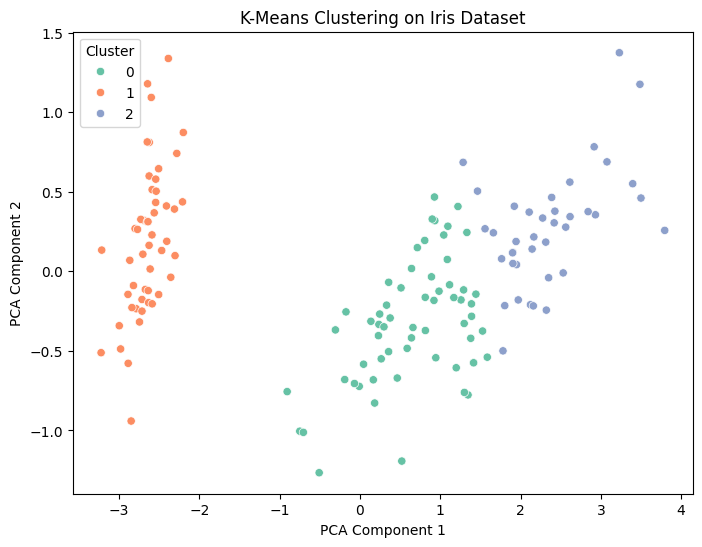

In [3]:

# Apply K-Means with 3 clusters (known from Iris)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="Set2")
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


Task 2: Image Segmentation using K-Means

In [ ]:
# Install necessary packages
!pip install opencv-python-headless pillow matplotlib scikit-learn --quiet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import requests
from io import BytesIO

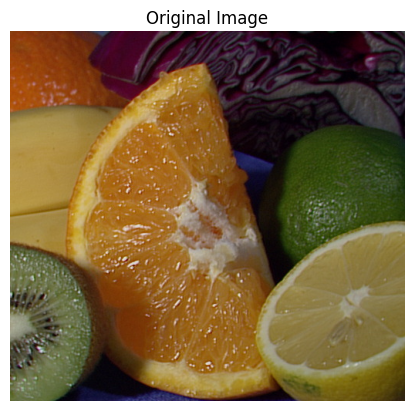

In [12]:

# Load image from URL using PIL
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')

# Display the original image
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

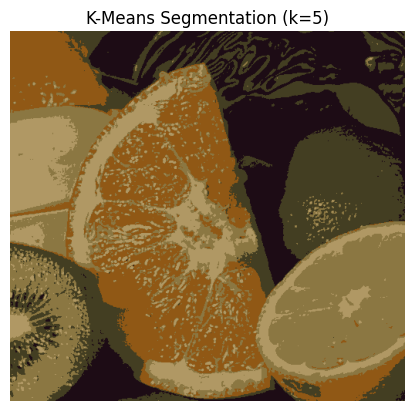

In [16]:
# Convert to NumPy array and reshape to (num_pixels, 3)
img_np = np.array(img)
pixel_vals = img_np.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# K-Means Clustering
k = 5  # Number of clusters/colors
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixel_vals)  # Must fit before using cluster_centers_ or labels_

# Replace pixels with cluster centers (quantized colors)
segmented_data = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_data.reshape(img_np.shape)
segmented_image = np.uint8(segmented_image)

# Display segmented image
plt.imshow(segmented_image)
plt.title(f"K-Means Segmentation (k={k})")
plt.axis('off')
plt.show()
